In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = ("~/Downloads/sentiment labelled sentences/yelp_labelled.txt"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['text', 'sentiment']

In [3]:
sms_raw.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
keywords = ['not', 'overpriced', 'disgusted', 'shocked', 'never', 'suck', 'bad']
for key in keywords:
     sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

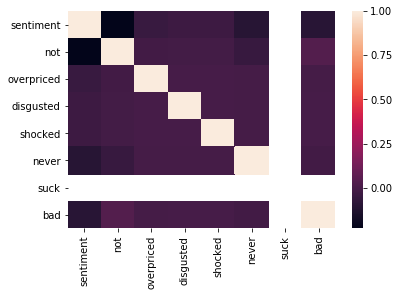

In [5]:
sns.heatmap(sms_raw.corr())

In [6]:
data = sms_raw[keywords]
target = sms_raw['sentiment']

In [7]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 406


In [10]:
1000 - 406

594

In [11]:
594 / 1000

0.594

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[113, 387],
       [ 19, 481]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.565
Testing on Sample: 0.594


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.62, 0.58, 0.63, 0.55, 0.61, 0.6 , 0.6 , 0.59, 0.56, 0.58])

**These scores are consistent. The model is not overfitting**

## Classifier 2

For Classifier 2 I added three addtional keywords

In [16]:
keywords2 = ['not', 'overpriced', 'disgusted', 'shocked', 'never', 'suck', 'bad', 'horrible', 'disappointing', 'gross']
for key in keywords2:
     sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [17]:
data = sms_raw[keywords2]
target = sms_raw['sentiment']

In [18]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 401


In [20]:
1000-401

599

In [21]:
599/1000

0.599

In [23]:
confusion_matrix(target, y_pred)

array([[118, 382],
       [ 19, 481]])

**There is slight improvement in predicting True negatives and False Positives.  False negatives and true positives remained the same**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.57
Testing on Sample: 0.599


In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.64, 0.58, 0.63, 0.55, 0.62, 0.6 , 0.6 , 0.59, 0.58, 0.58])

**Additional keywords improved my model without overfitting**

## Classifier 3

For Classifier 3 I used positive words as keywords

In [24]:
keywords3 = ['fantastic', 'amazing', 'loved', 'delicious', 'great', 'good']
for key in keywords3:
     sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [25]:
data = sms_raw[keywords3]
target = sms_raw['sentiment']

In [26]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 413


In [27]:
1000-413

587

In [28]:
587/1000

0.587

In [29]:
confusion_matrix(target, y_pred)

array([[485,  15],
       [398, 102]])

**This model is not good at identifying false negatives - mistakenly identified something as not a good review when it is not.  But this model is better at identifity true positives.**  

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.59
Testing on Sample: 0.587


In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.6 , 0.64, 0.61, 0.58, 0.55, 0.57, 0.58, 0.6 , 0.54, 0.6 ])

**This model does not overfit**

## Classifier 4

**I added additional keywords for classifier 4**

In [34]:
keywords4 = ['fantastic', 'amazing', 'loved', 'delicious', 'great', 'good', 'best', 'friendly', 'tasty', 'happy', 'perfect', 'excellent']
for key in keywords4:
     sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [35]:
data = sms_raw[keywords4]
target = sms_raw['sentiment']

In [36]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 372


In [37]:
1000-372

628

In [38]:
628/1000

0.628

In [39]:
confusion_matrix(target, y_pred)

array([[482,  18],
       [354, 146]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.64
Testing on Sample: 0.628


In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.6 , 0.67, 0.65, 0.6 , 0.62, 0.61, 0.68, 0.65, 0.58, 0.61])

**This model does not overfit**

## Classifier 5

In [42]:
keywords5 = ['fantastic', 'amazing', 'loved', 'delicious', 'great', 'good', 'best', 'friendly', 'tasty', 'happy', 'perfect', 'excellent', 'nice', 'enjoyed', 'awesome', 'clean']
for key in keywords5:
     sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [43]:
data = sms_raw[keywords5]
target = sms_raw['sentiment']

In [44]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 353


In [45]:
1000-353

647

In [46]:
647/1000

0.647

In [47]:
confusion_matrix(target, y_pred)

array([[480,  20],
       [333, 167]])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.66
Testing on Sample: 0.647


In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.61, 0.67, 0.65, 0.6 , 0.64, 0.62, 0.71, 0.66, 0.63, 0.67])

**This classifier works the best.  I added more keywords without overfitting the model**

**Do any of your classifiers seem to overfit?** 
NO

**Which seem to perform best, why?**
 The  classifiers that work best are the positive classifiers.  There was an improvement of in the model's performance as I continued to add more positive keywords to the model.  

**Which features seem to be most impactful to performance**
Positive features seem to be most impactful to perfomrance.

Classifier 3 ran six keywords and had a 58% success rate. Classifier 4 ran twelve positive keywords and had a 62% success rate. Classifier 5 ran sixteen keywords and had a success rate of approx.64%.  

Whereas, adding more negative words to the keywords did not improve the model as evidenced by the similar success rate of Classifier 1 with seven negative keywords, and  Classifier 2 with ten negative keywords.  Both had a success rate of approx. 59%